## Loading Data

In [23]:
import pandas as pd

path = "2010_2022_pov_data.csv"
df = pd.read_csv(path)
df.head()

/tmp/ipykernel_25640/4217545085.py:4: DtypeWarning: Columns (26,27,28,29,30,31,44,45,46,47,48,49,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,198,199,202,203,204,205,208,209,210,211,214,215,216,217,220,221,222,223,232,233,234,235,238,239,240,241,244,245,246,247,248,249,256,257,258,259,262,263,264,265,268,269,270,271,273,274,275,276,277,296,297,302,303,308,309,346,347,348,349,350,351) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,GEO_ID,NAME,S1701_C01_001E,S1701_C01_001M,S1701_C02_001E,S1701_C02_001M,S1701_C03_001E,S1701_C03_001M,S1701_C01_002E,S1701_C01_002M,...,S1701_C03_061E,S1701_C03_061M,Unnamed: 368,S1701_C01_062E,S1701_C01_062M,S1701_C02_062E,S1701_C02_062M,S1701_C03_062E,S1701_C03_062M,Unnamed: 374
0,0500000US01003,"Baldwin County, Alabama",180686,985,23610,4573,13.1,2.5,41865,592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0500000US01015,"Calhoun County, Alabama",116553,1987,29082,4105,25.0,3.4,26847,296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US01043,"Cullman County, Alabama",79692,834,16848,3811,21.1,4.8,18892,588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US01049,"DeKalb County, Alabama",70453,682,13788,4362,19.6,6.2,18233,460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US01051,"Elmore County, Alabama",72069,3261,7923,2292,11.0,3.1,18189,306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# selecting and renaming columns of interest
columns_renamed = {
                    'NAME': 'NAME',
                    'S1701_C01_001E': 'total_pop',
                    'S1701_C02_001E': 'below_pov',
                    'S1701_C01_002E': 'total_under_18',
                    'S1701_C02_002E': 'below_pov_under_18',
                    'S1701_C01_004E': 'total_18_to_64',
                    'S1701_C02_004E': 'below_pov_18_to_64',
                    'S1701_C01_005E': 'total_over_64',
                    'S1701_C02_005E': 'below_pov_over_64',
                    'S1701_C01_006E': 'total_male',
                    'S1701_C02_006E': 'below_pov_male',
                    'S1701_C01_007E': 'total_female',
                    'S1701_C02_007E': 'below_pov_female',
                    'YEAR': 'YEAR'}
df = df.rename(columns=columns_renamed)[columns_renamed.values()]
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9986 entries, 0 to 9985
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   NAME                9986 non-null   object
 1   total_pop           9986 non-null   int64 
 2   below_pov           9986 non-null   int64 
 3   total_under_18      9986 non-null   int64 
 4   below_pov_under_18  9986 non-null   int64 
 5   total_18_to_64      9986 non-null   int64 
 6   below_pov_18_to_64  9986 non-null   int64 
 7   total_over_64       9986 non-null   object
 8   below_pov_over_64   9986 non-null   object
 9   total_male          9986 non-null   int64 
 10  below_pov_male      9986 non-null   int64 
 11  total_female        9986 non-null   int64 
 12  below_pov_female    9986 non-null   int64 
 13  YEAR                9986 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [25]:
df["total_pov_ratio"] = df["below_pov"] / df["total_pop"]
df["under_18_pov_ratio"] = df["below_pov_under_18"] / df["total_under_18"]
df["18_to_64_pov_ratio"] = df["below_pov_18_to_64"] / df["total_18_to_64"]
#df["total_pov_ratio"] = df["below_pov_over_64"] / df["total_over_64"]
df["male_pov_ratio"] = df["below_pov_male"] / df["total_male"]
df["female_pov_ratio"] = df["below_pov_female"] / df["total_female"]
df.head()

,NAME,total_pop,below_pov,total_under_18,below_pov_under_18,total_18_to_64,below_pov_18_to_64,total_over_64,below_pov_over_64,total_male,below_pov_male,total_female,below_pov_female,YEAR,total_pov_ratio,under_18_pov_ratio,18_to_64_pov_ratio,male_pov_ratio,female_pov_ratio
0,"Baldwin County, Alabama",180686,23610,41865,8091,109204,13958,29617,1561,88311,8822,92375,14788,2010,0.130669,0.193264,0.127816,0.099897,0.160087
1,"Calhoun County, Alabama",116553,29082,26847,9137,73074,18319,16632,1626,55830,11527,60723,17555,2010,0.249517,0.340336,0.250691,0.206466,0.289100
2,"Cullman County, Alabama",79692,16848,18892,5543,48175,10051,12625,1254,39438,7604,40254,9244,2010,0.211414,0.293405,0.208635,0.192809,0.229642
3,"DeKalb County, Alabama",70453,13788,18233,5609,42707,7109,9513,1070,35219,6769,35234,7019,2010,0.195705,0.307629,0.166460,0.192197,0.199211
4,"Elmore County, Alabama",72069,7923,18189,2707,45045,4698,8835,518,34368,4073,37701,3850,2010,0.109936,0.148826,0.104296,0.118511,0.102119


In [40]:
df_yoy = pd.DataFrame()

for name in set(df["NAME"].to_list()):
    # creating copy to fully separate dataframes
    dt = df[df["NAME"] == name].copy()
    # this works because we loaded and added data to the dataset 
    # in order of oldest to newest
    dt["total_pop_yoy"] = dt["total_pop"].pct_change(periods=1)
    dt["total_pov_ratio_yoy"] = dt["total_pov_ratio"].pct_change(periods=1)
    df_yoy = pd.concat([df_yoy, dt])
df_yoy

,NAME,total_pop,below_pov,total_under_18,below_pov_under_18,total_18_to_64,below_pov_18_to_64,total_over_64,below_pov_over_64,total_male,...,total_female,below_pov_female,YEAR,total_pov_ratio,under_18_pov_ratio,18_to_64_pov_ratio,male_pov_ratio,female_pov_ratio,total_pop_yoy,total_pov_ratio_yoy
38,"Jefferson County, Arkansas",70910,15716,17624,6258,43174,8287,10112,1171,35344,...,35566,8311,2010,0.221633,0.355084,0.191944,0.209512,0.233678,NaN,NaN
856,"Jefferson County, Arkansas",70207,16570,17771,6384,42556,8318,9880,1868,32829,...,37378,8661,2011,0.236016,0.359237,0.195460,0.240915,0.231714,-0.009914,0.064897
1678,"Jefferson County, Arkansas",68723,15794,17732,5571,40824,9281,10167,942,32058,...,36665,8860,2012,0.229821,0.314178,0.227342,0.216295,0.241647,-0.021137,-0.026249
2503,"Jefferson County, Arkansas",66726,17346,16588,6686,39819,8642,10319,2018,31261,...,35465,9702,2013,0.259959,0.403062,0.217032,0.244522,0.273565,-0.029059,0.131134
3331,"Jefferson County, Arkansas",67049,18390,16383,7630,40494,9980,10172,780,32481,...,34568,9737,2014,0.274277,0.465727,0.246456,0.266402,0.281677,0.004841,0.055079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6031,"Johnson County, Iowa",141265,23110,29782,2717,20968,1956,29627,2562,94907,...,47776,17192,2017,0.163593,0.091230,0.093285,0.213851,0.359846,0.028511,-0.126827
6868,"Johnson County, Iowa",143968,24388,30047,5398,21433,4381,29713,5064,96806,...,48844,14315,2018,0.169399,0.179652,0.204404,0.185174,0.293076,0.019134,0.035487
7707,"Johnson County, Iowa",143912,24820,29666,2980,21442,2364,29666,2980,96093,...,47784,18091,2019,0.172467,0.100452,0.110251,0.221161,0.378600,-0.000389,0.018110
8548,"Johnson County, Iowa",148750,22974,30079,3574,22741,3066,29979,3474,99006,...,50205,14692,2021,0.154447,0.118820,0.134823,0.184373,0.292640,0.033618,-0.104481


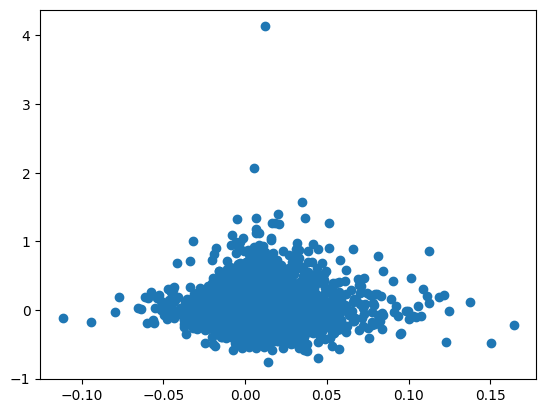

In [47]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(
    x=(df_yoy["total_pop_yoy"]), 
    y=(df_yoy["total_pov_ratio_yoy"])
)


This appears to show zero relationship between the population growth year over year and the poverty rate growth year over year